In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housing-price-prediction-data/housing_price_dataset.csv


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("/kaggle/input/housing-price-prediction-data/housing_price_dataset.csv")
df.head()


,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 non-null  int64  
 3   Neighborhood  50000 non-null  object 
 4   YearBuilt     50000 non-null  int64  
 5   Price         50000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB


In [5]:
df.isnull().sum()

SquareFeet      0
Bedrooms        0
Bathrooms       0
Neighborhood    0
YearBuilt       0
Price           0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.describe()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2006.374680,3.498700,1.995420,1985.404420,224827.325151
std,575.513241,1.116326,0.815851,20.719377,76141.842966
min,1000.000000,2.000000,1.000000,1950.000000,-36588.165397
25%,1513.000000,3.000000,1.000000,1967.000000,169955.860225
50%,2007.000000,3.000000,2.000000,1985.000000,225052.141166
75%,2506.000000,4.000000,3.000000,2003.000000,279373.630052
max,2999.000000,5.000000,3.000000,2021.000000,492195.259972


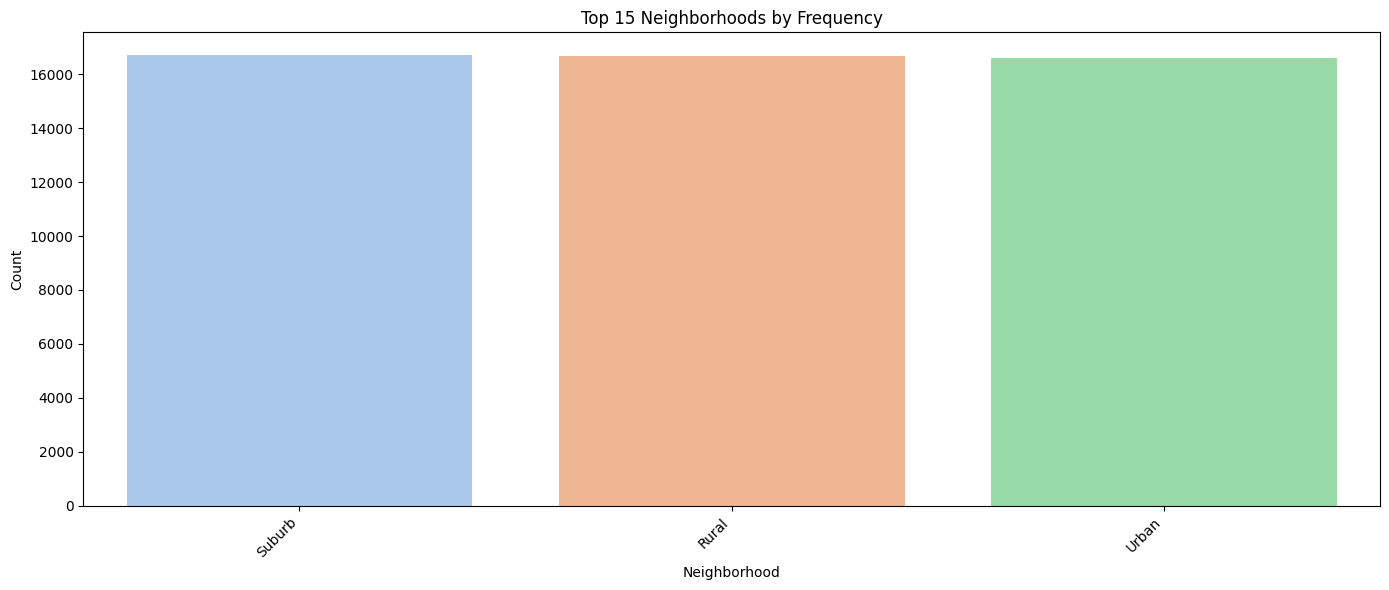

In [8]:
# Plot the top 15 most frequent neighborhoods (including NaNs if present)
top_neighborhoods = df['Neighborhood'].value_counts().nlargest(15).index
filtered_df = df[df['Neighborhood'].isin(top_neighborhoods)]

# Plot
plt.figure(figsize=(14, 6))
sns.countplot(data=filtered_df, x='Neighborhood', order=top_neighborhoods, palette='pastel')
plt.title('Top 15 Neighborhoods by Frequency')
plt.xlabel('Neighborhood')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


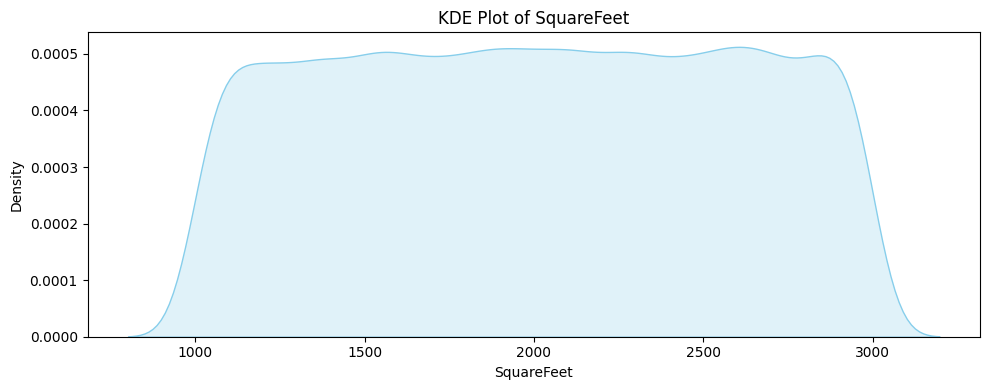

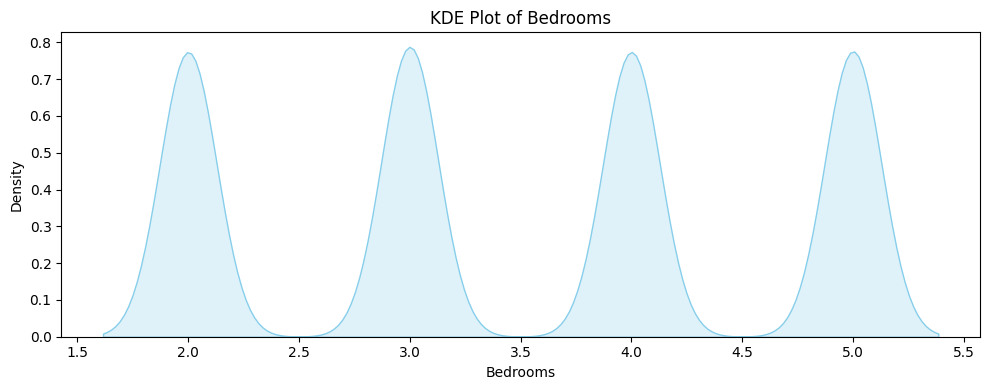

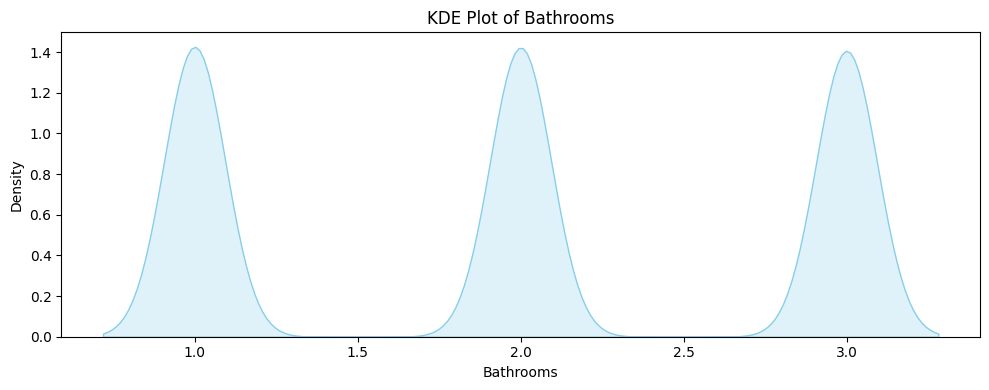

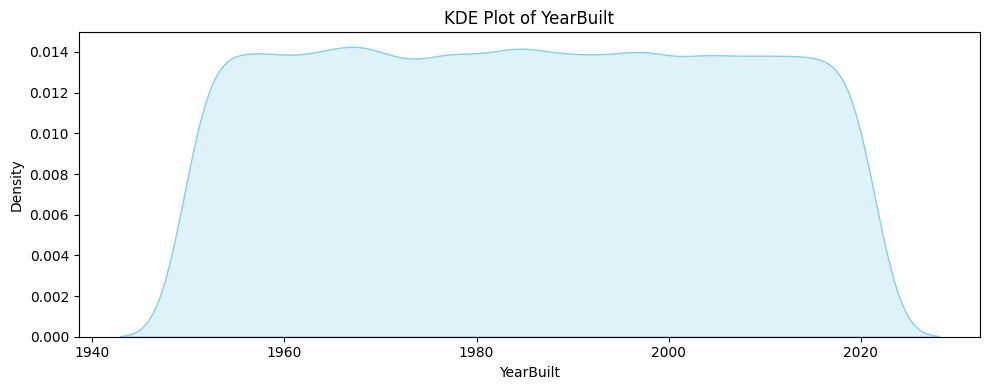

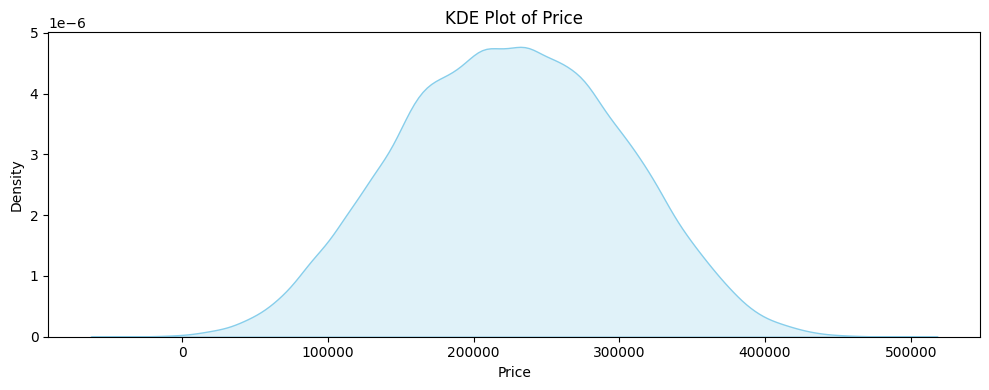

In [9]:
# List of columns to plot
features = ['SquareFeet', 'Bedrooms', 'Bathrooms', 'YearBuilt', 'Price']

# Plot each feature separately
for feature in features:
    plt.figure(figsize=(10, 4))
    sns.kdeplot(data=df, x=feature, fill=True, color='skyblue')
    plt.title(f'KDE Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.tight_layout()
    plt.show()


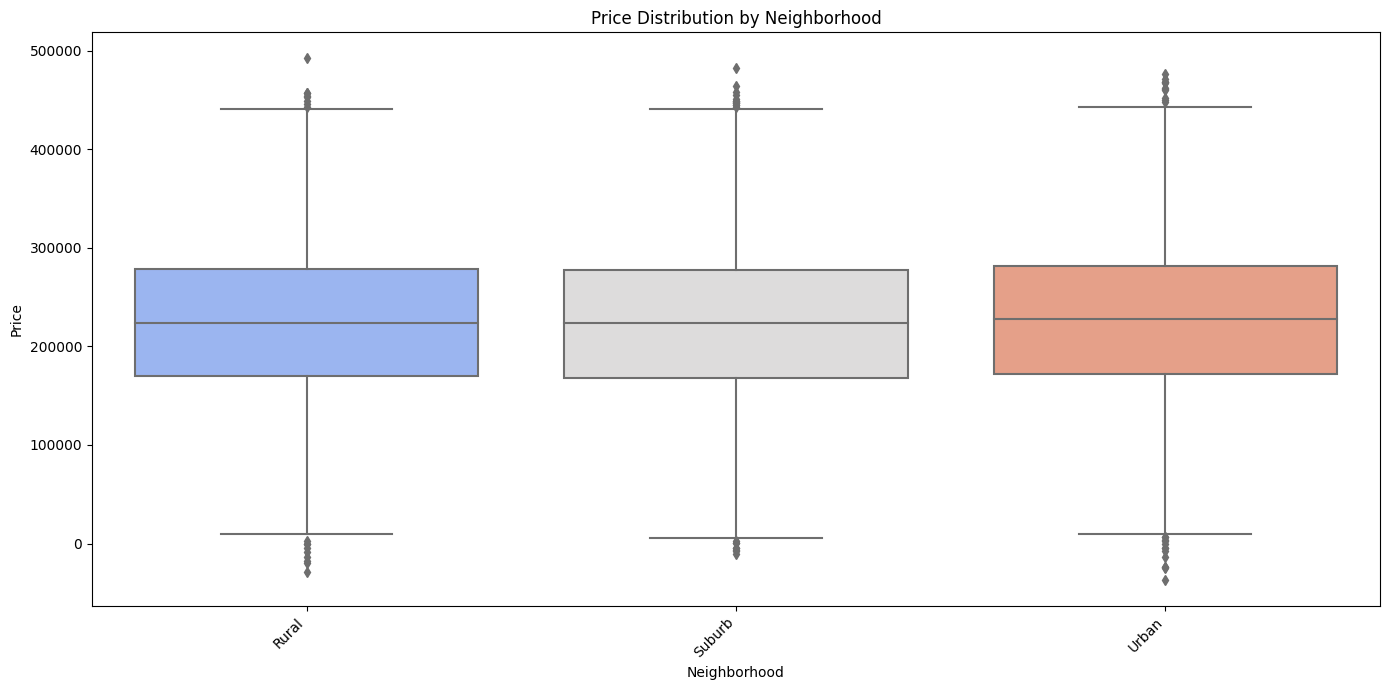

In [10]:
# Optional: select top 15 most frequent neighborhoods for clarity
top_neighborhoods = df['Neighborhood'].value_counts().nlargest(15).index
filtered_df = df[df['Neighborhood'].isin(top_neighborhoods)]

# Plot
plt.figure(figsize=(14, 7))
sns.boxplot(data=filtered_df, x='Neighborhood', y='Price', palette='coolwarm')
plt.title('Price Distribution by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


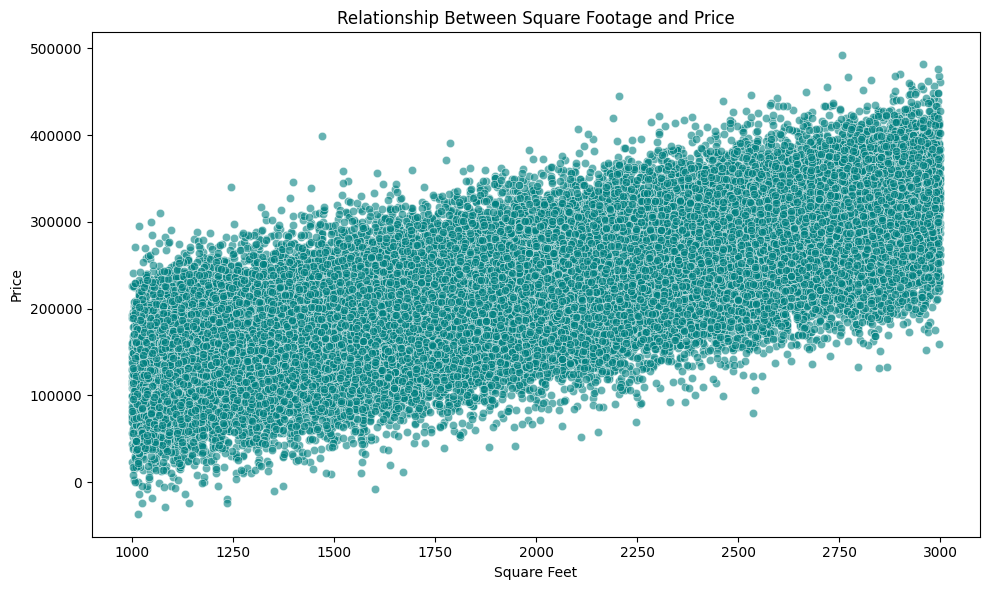

In [11]:
# Scatter plot of SquareFeet vs Price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='SquareFeet', y='Price', color='teal', alpha=0.6)
plt.title('Relationship Between Square Footage and Price')
plt.xlabel('Square Feet')
plt.ylabel('Price')
plt.tight_layout()
plt.show()


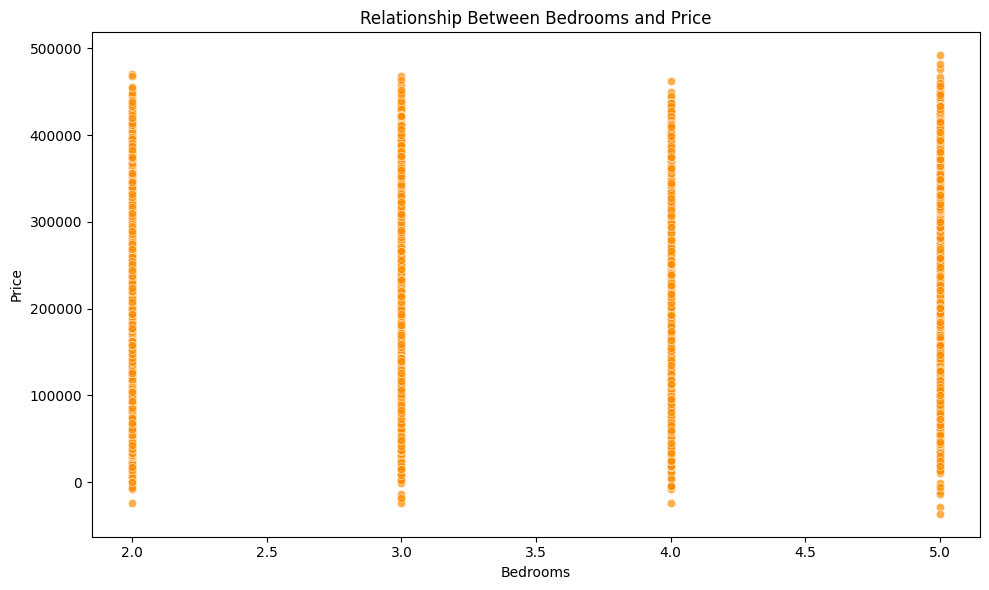

In [12]:
# Scatter plot: Bedrooms vs Price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Bedrooms', y='Price', color='darkorange', alpha=0.7)
plt.title('Relationship Between Bedrooms and Price')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

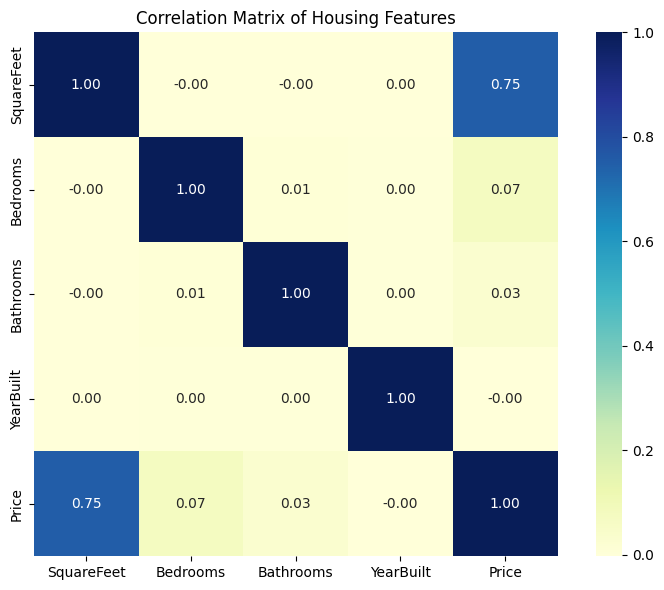

In [13]:
# Select the relevant columns
cols = ['SquareFeet', 'Bedrooms', 'Bathrooms', 'YearBuilt', 'Price']
df_corr = df[cols]

# Compute the correlation matrix
corr_matrix = df_corr.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', fmt=".2f", square=True)
plt.title('Correlation Matrix of Housing Features')
plt.tight_layout()
plt.show()


In [14]:
from sklearn.preprocessing import LabelEncoder

# Encode the neighborhood column (only 3 unique categories)
le = LabelEncoder()
df['Neighborhood_encoded'] = le.fit_transform(df['Neighborhood'])

# Show mapping
mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label Encoding Mapping:", mapping)

# Preview result
df[['Neighborhood', 'Neighborhood_encoded']].head()

Label Encoding Mapping: {'Rural': 0, 'Suburb': 1, 'Urban': 2}


,Neighborhood,Neighborhood_encoded
0,Rural,0
1,Rural,0
2,Suburb,1
3,Urban,2
4,Suburb,1


In [15]:
# Define thresholds
mean_price = df['Price'].mean()
max_price = df['Price'].max()

# Create a function to categorize prices
def categorize_price(price):
    if price < mean_price:
        return 'Cheap'
    elif price < (mean_price + max_price) / 2:
        return 'Moderate'
    else:
        return 'Expensive'

# Apply the categorization
df['Price_Category'] = df['Price'].apply(categorize_price)

# Preview result
df[['Price', 'Price_Category']].head()

,Price,Price_Category
0,215355.283618,Cheap
1,195014.221626,Cheap
2,306891.012076,Moderate
3,206786.787153,Cheap
4,272436.239065,Moderate


In [16]:
from sklearn.preprocessing import LabelEncoder

# Initialize the encoder
le = LabelEncoder()

# Fit and transform the column
df['Price_Category_encoded'] = le.fit_transform(df['Price_Category'])

# View the mapping
mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label Encoding Mapping:", mapping)

# Preview
df[['Price_Category', 'Price_Category_encoded']].head()

Label Encoding Mapping: {'Cheap': 0, 'Expensive': 1, 'Moderate': 2}


,Price_Category,Price_Category_encoded
0,Cheap,0
1,Cheap,0
2,Moderate,2
3,Cheap,0
4,Moderate,2


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Step 1: Define features and classification target
features = ['SquareFeet', 'Bedrooms', 'Bathrooms', 'YearBuilt', 'Neighborhood_encoded']
X = df[features]
y = df['Price_Category_encoded']  # 0 = Cheap, 1 = Moderate, 2 = Expensive

# Step 2: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train multinomial logistic regression
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)

# Step 4: Predict and evaluate
y_pred = model.predict(X_test)

print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.77

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.81      0.81      4999
           1       0.00      0.00      0.00       358
           2       0.74      0.78      0.76      4643

    accuracy                           0.77     10000
   macro avg       0.51      0.53      0.52     10000
weighted avg       0.74      0.77      0.76     10000


Confusion Matrix:
 [[4058    0  941]
 [   2    0  356]
 [1002    0 3641]]
